<a href="https://colab.research.google.com/github/NAGPALADITI14/Data_Mining/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Heart_health.csv')
data.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
drop_cols = ['ID','Name']
data=data.drop(columns=[col for col in drop_cols if col in data.columns],errors='ignore')
label_encoder = {}
for col in ['Gender','Smoker']:
  le=LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoder[col] = le

data['Blood Pressure(mmHg)']=data['Blood Pressure(mmHg)'].astype(str).str.split('/').str[0].astype(float)
print(data.head())

   Age  Gender  Height(cm)  Weight(kg)  Blood Pressure(mmHg)  \
0   45       1         175          80                 120.0   
1   35       0         160          65                 110.0   
2   55       1         180          85                 130.0   
3   40       0         165          70                 115.0   
4   50       1         170          75                 125.0   

   Cholesterol(mg/dL)  Glucose(mg/dL)  Smoker  Exercise(hours/week)  \
0                 200              90       0                     3   
1                 180              80       0                     2   
2                 220              95       1                     4   
3                 190              85       0                     3   
4                 210              92       1                     2   

   Heart Attack  
0             0  
1             0  
2             1  
3             0  
4             1  


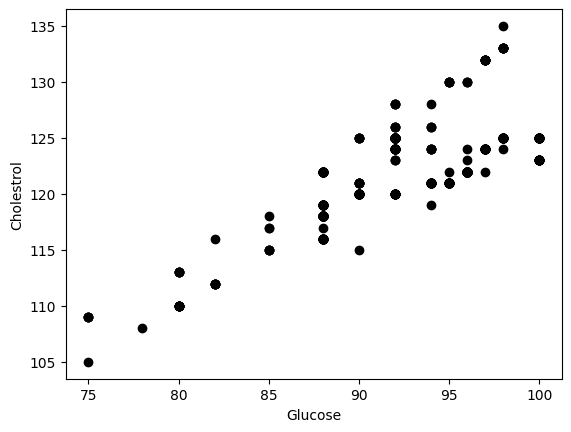

In [ ]:
X=data[["Glucose(mg/dL)","Blood Pressure(mmHg)"]]
plt.scatter(X["Glucose(mg/dL)"],X["Blood Pressure(mmHg)"],c='black')
plt.xlabel('Glucose')
plt.ylabel("Cholestrol")
plt.show()

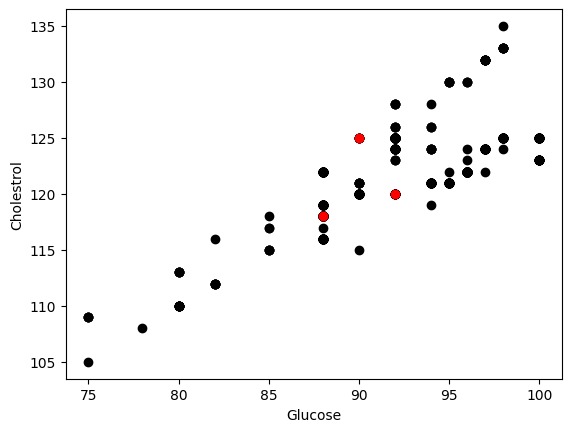

In [ ]:
k=3
Centroids = (X.sample(n=k))
Centroids = X[["Glucose(mg/dL)", "Blood Pressure(mmHg)"]].sample(n=k).reset_index(drop=True)

plt.scatter(X["Glucose(mg/dL)"],X["Blood Pressure(mmHg)"],c='black')
plt.scatter(Centroids["Glucose(mg/dL)"],Centroids["Blood Pressure(mmHg)"],c='red')
plt.xlabel('Glucose')
plt.ylabel("Cholestrol")
plt.show()

In [ ]:
diff = 1
j = 0

while diff != 0:
    distance_df = pd.DataFrame()
    for i, (_, row_c) in enumerate(Centroids.iterrows()):
        ED = np.sqrt((X["Glucose(mg/dL)"] - row_c["Glucose(mg/dL)"])**2 +
                     (X["Blood Pressure(mmHg)"] - row_c["Blood Pressure(mmHg)"])**2)
        distance_df[i] = ED

    X.loc[:,"Cluster"] = distance_df.idxmin(axis=1) + 1
    Centroids_new = X.groupby("Cluster")[["Glucose(mg/dL)", "Blood Pressure(mmHg)"]].mean().reset_index(drop=True)

    if j == 0:
        diff = 1
    else:
        diff = np.linalg.norm(Centroids_new.values - Centroids.values)
        print(f"Iteration {j}, diff: {diff}")

    Centroids = Centroids_new.copy()
    j += 1


Iteration 1, diff: 1.1874886112907639
Iteration 2, diff: 0.5870619550297358
Iteration 3, diff: 0.4147043072108021
Iteration 4, diff: 0.7309214638559658
Iteration 5, diff: 0.20673494647799742
Iteration 6, diff: 1.0020839672013049
Iteration 7, diff: 0.681180172874019
Iteration 8, diff: 0.079004144791823
Iteration 9, diff: 0.0


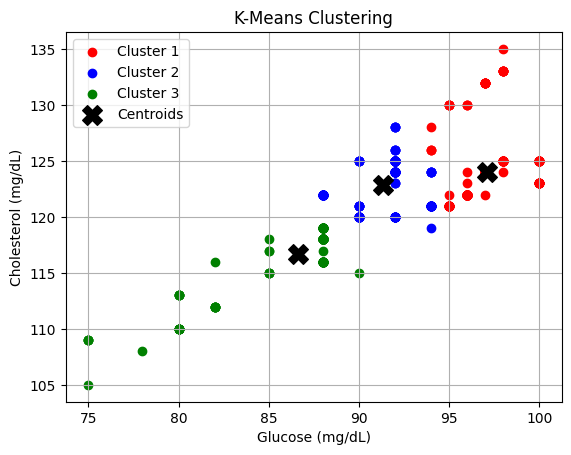

In [ ]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(1, k+1):
    cluster_data = X[X["Cluster"] == i]
    plt.scatter(cluster_data["Glucose(mg/dL)"], cluster_data["Blood Pressure(mmHg)"], c=colors[i-1], label=f'Cluster {i}')

plt.scatter(Centroids["Glucose(mg/dL)"], Centroids["Blood Pressure(mmHg)"], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Glucose (mg/dL)")
plt.ylabel("Cholesterol (mg/dL)")
plt.title("K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()


# **# Hierarchical Clustering**

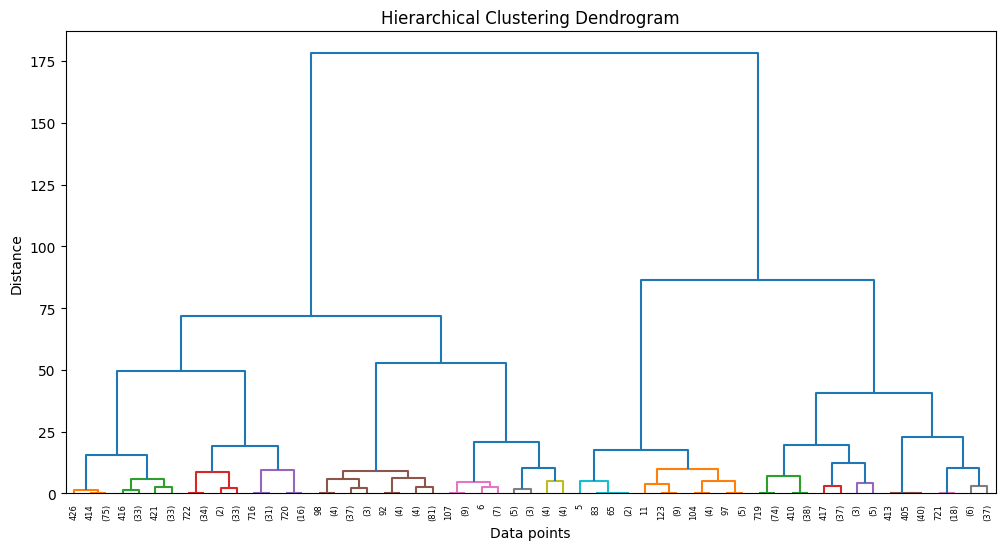

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

X = data[["Glucose(mg/dL)", "Blood Pressure(mmHg)"]].copy()
linked = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5, color_threshold=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


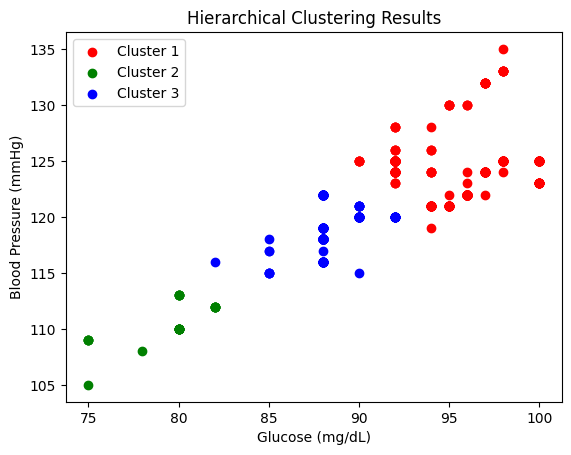

In [ ]:
k = 3
X["Cluster"] = fcluster(linked, k, criterion='maxclust')
colors = ['red', 'green', 'blue']
for cluster in range(1, k + 1):
    subset = X[X["Cluster"] == cluster]
    plt.scatter(subset["Glucose(mg/dL)"], subset["Blood Pressure(mmHg)"], c=colors[cluster - 1], label=f'Cluster {cluster}')

plt.xlabel("Glucose (mg/dL)")
plt.ylabel("Blood Pressure (mmHg)")
plt.title("Hierarchical Clustering Results")
plt.legend()
plt.show()
